### ML EDA on Kaggle Dataset : https://www.kaggle.com/datasets/dilwong/flightprices/code

#Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from google.colab import drive
import re
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb


#connecting to google drive to read excel {comment out when submitting}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Minimal_Flights.xlsx to Minimal_Flights.xlsx


In [ ]:
df = pd.read_excel('Minimal_Flights.xlsx')

In [ ]:
#In this analysis, we will only be looking at performing EDA and predicting prices for non-stop flights for simplicity and ease
#Flights with multiple stops have added variables such as layover times, multiple departure an arrival times, multiple airlines etc and would
#require separate analysis
#we will filter our dataset accordingly
df = df[df['isNonStop'] == True]

In [ ]:
df

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
14,3d02a2206641557ce8a72b5af896893a,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,PT5H19M,0,False,False,...,1650256440,2022-04-17T21:34:00.000-07:00,SFO,ATL,Delta,DL,Airbus A330-200,19140,2135,coach
15,7d7dc04357da9adb964a7ff2cd64ff4c,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,PT5H20M,0,False,False,...,1650226800,2022-04-17T13:20:00.000-07:00,SFO,ATL,Delta,DL,Boeing 737-900,19200,2135,coach
40,4f146c6baffd097e4d800330e0ec52ab,2022-04-16,2022-04-17,BOS,SFO,LH0OAVMN,PT6H53M,0,False,False,...,1650260880,2022-04-17T22:48:00.000-07:00,SFO,BOS,Alaska Airlines,AS,Boeing 737-900,24780,2698,coach
41,03c76bd25c22062e50b47a0f5da717b2,2022-04-16,2022-04-17,BOS,SFO,VAA0PQEN,PT6H42M,0,False,False,...,1650221880,2022-04-17T11:58:00.000-07:00,SFO,BOS,United,UA,Boeing 737 MAX 9,24120,2698,coach
42,bb19238ec1bae88a6b0d73bd6f767b77,2022-04-16,2022-04-17,BOS,SFO,VAA0PQEN,PT6H44M,0,False,False,...,1650258000,2022-04-17T22:00:00.000-07:00,SFO,BOS,United,UA,Boeing 737 MAX 9,24240,2698,coach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67730,eb61d1bb6469c320eeaf7a758887c359,2022-04-18,2022-06-05,EWR,SFO,UAA7JQEN,PT5H59M,0,False,False,...,1654479840,2022-06-05T18:44:00.000-07:00,SFO,EWR,United,UA,Boeing 777,21540,2566,coach
67731,68952fd1813099695f5ab71649269421,2022-04-18,2022-06-05,EWR,SFO,UAA7JQEN,PT6H9M,0,False,False,...,1654485840,2022-06-05T20:24:00.000-07:00,SFO,EWR,United,UA,BOEING 777-300ER,22140,2566,coach
67737,f3087bd0f553208f54acbdc5e3c70720,2022-04-18,2022-06-05,EWR,SFO,EAA0OHEN,PT5H59M,0,False,False,...,1654474140,2022-06-05T17:09:00.000-07:00,SFO,EWR,United,UA,Boeing 777,21540,2566,coach
67738,9f2511cd3033cd9bfaee28f68838b555,2022-04-18,2022-06-05,EWR,SFO,EAA0OHEN,PT6H14M,0,False,False,...,1654491240,2022-06-05T21:54:00.000-07:00,SFO,EWR,United,UA,BOEING 777-300ER,22440,2566,coach


#Data Cleaning

In [ ]:
df.dtypes

legId                                        object
searchDate                           datetime64[ns]
flightDate                           datetime64[ns]
startingAirport                              object
destinationAirport                           object
fareBasisCode                                object
travelDuration                               object
elapsedDays                                   int64
isBasicEconomy                                 bool
isRefundable                                   bool
isNonStop                                      bool
baseFare                                    float64
totalFare                                   float64
seatsRemaining                                int64
totalTravelDistance                           int64
segmentsDepartureTimeEpochSeconds            object
segmentsDepartureTimeRaw                     object
segmentsArrivalTimeEpochSeconds              object
segmentsArrivalTimeRaw                       object
segmentsArri

In [ ]:
#In "segmentsArrivalTimeRaw" column String containing the departure time (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) 
#We will create new columns that displays arrival time to destination
# convert the datetime column to a pandas datetime object
df['segmentsArrivalTimeRaw'] = pd.to_datetime(df['segmentsArrivalTimeRaw'])

# extract the time from the datetime column and format it as a string
df['arrival_to_destination'] = df['segmentsArrivalTimeRaw'].dt.strftime('%H:%M:%S')

#Similarly, We will create new columns that displays departure time from origin
# extract the time part of the string


# extract the time component from the timestamp column
times = []
for time_str in df['segmentsDepartureTimeRaw']:
    datetime_obj = datetime.strptime(time_str, '%Y-%m-%dT%H:%M:%S.%f%z')
    time = datetime_obj.strftime('%H:%M:%S')
    times.append(time)

# create a new column with the extracted time values
df['Departure_Time_from_Origin'] = times

#next cleaning duration column
import datetime

def parse_duration(duration_str):
    duration = duration_str.replace('PT', '')
    if 'H' in duration and 'M' in duration:
        hours, minutes = duration.split('H')
        minutes = minutes.replace('M', '')
    elif 'H' in duration:
        hours, minutes = duration.split('H')
        minutes = '0'
    elif 'M' in duration:
        hours = '0'
        minutes = duration.replace('M', '')
    else:
        return datetime.timedelta()
    return datetime.timedelta(hours=int(hours), minutes=int(minutes))

# apply the parse_duration function to the travelDuration column
df['travelDuration'] = df['travelDuration'].apply(parse_duration)

# Extract hours and minutes as separate columns
df['hours'] = df['travelDuration'].astype(str).apply(lambda x: re.findall('\d+:\d+', x)[0].split(':')[0])
df['minutes'] = df['travelDuration'].astype(str).apply(lambda x: re.findall('\d+:\d+', x)[0].split(':')[1])

# Convert hours and minutes to integers
df['hours'] = df['hours'].astype(int)
df['minutes'] = df['minutes'].astype(int)

# Calculate total duration in minutes
df['total_duration_minutes'] = df['hours'] * 60 + df['minutes']

In [ ]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode', 'arrival_to_destination',
       'Departure_Time_from_Origin', 'hours', 'minutes',
       'total_duration_minutes'],
      dtype='object')

In [ ]:
#Getting rid of unnecessary or repetitive columns:

#legid- unique id 
#travelDuration, 'hours' and 'minutes- captured under total_duration_minutes

#isNonStop- true for all
#baseFare- we will only be considering totalfare
#segmentsDepartureTimeEpochSeconds, segmentsDepartureTimeRaw- captured under Departure_Time_from_Origin
#segmentsArrivalTimeEpochSeconds, segmentsArrivalTimeRaw- captured under arrival_to_destination
#segmentsArrivalAirportCode, destinationAirport- SFO for all
#segmentsDepartureAirportCode- captured under startingAirport
#segmentsAirlineName- captured under Airline code
#segmentsDurationInSeconds - captured under total_duration_minutes
#segmentsDistance- captured under totalTravelDistance

df.drop([ 'legId', 'travelDuration', 'hours', 'minutes', 'isNonStop', 'baseFare', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       "segmentsAirlineName", 'segmentsDurationInSeconds', 'segmentsDistance'

         ], axis=1, inplace=True)

In [ ]:
df

,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineCode,segmentsEquipmentDescription,segmentsCabinCode,arrival_to_destination,Departure_Time_from_Origin,total_duration_minutes
14,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,0,False,False,558.60,6,2135,DL,Airbus A330-200,coach,21:34:00,19:15:00,319
15,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,0,False,False,558.60,7,2135,DL,Boeing 737-900,coach,13:20:00,11:00:00,320
40,2022-04-16,2022-04-17,BOS,SFO,LH0OAVMN,0,False,False,361.60,7,2698,AS,Boeing 737-900,coach,22:48:00,18:55:00,413
41,2022-04-16,2022-04-17,BOS,SFO,VAA0PQEN,0,False,False,366.60,1,2698,UA,Boeing 737 MAX 9,coach,11:58:00,08:16:00,402
42,2022-04-16,2022-04-17,BOS,SFO,VAA0PQEN,0,False,False,366.60,4,2698,UA,Boeing 737 MAX 9,coach,22:00:00,18:16:00,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67730,2022-04-18,2022-06-05,EWR,SFO,UAA7JQEN,0,False,False,508.60,9,2566,UA,Boeing 777,coach,18:44:00,15:45:00,359
67731,2022-04-18,2022-06-05,EWR,SFO,UAA7JQEN,0,False,False,508.60,9,2566,UA,BOEING 777-300ER,coach,20:24:00,17:15:00,369
67737,2022-04-18,2022-06-05,EWR,SFO,EAA0OHEN,0,False,False,698.59,9,2566,UA,Boeing 777,coach,17:09:00,14:10:00,359
67738,2022-04-18,2022-06-05,EWR,SFO,EAA0OHEN,0,False,False,698.59,9,2566,UA,BOEING 777-300ER,coach,21:54:00,18:40:00,374


# Explorartory Data Analysis 

DataFrame shape: (16511, 17)
   searchDate flightDate startingAirport destinationAirport fareBasisCode  \
14 2022-04-16 2022-04-17             ATL                SFO      MA0QA0MQ   
15 2022-04-16 2022-04-17             ATL                SFO      MA0QA0MQ   
40 2022-04-16 2022-04-17             BOS                SFO      LH0OAVMN   
41 2022-04-16 2022-04-17             BOS                SFO      VAA0PQEN   
42 2022-04-16 2022-04-17             BOS                SFO      VAA0PQEN   

    elapsedDays  isBasicEconomy  isRefundable  totalFare  seatsRemaining  \
14            0           False         False      558.6               6   
15            0           False         False      558.6               7   
40            0           False         False      361.6               7   
41            0           False         False      366.6               1   
42            0           False         False      366.6               4   

    totalTravelDistance segmentsAirlineCode segment

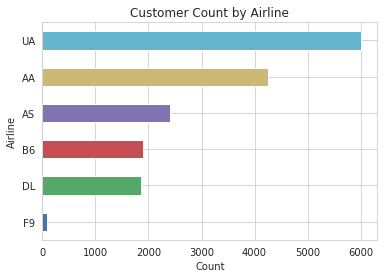

Summary statistics:
        elapsedDays     totalFare  seatsRemaining  totalTravelDistance  \
count  16511.000000  16511.000000    16511.000000         16511.000000   
mean       0.031979    359.831509        6.374356          1793.349827   
std        0.175949    215.372698        2.459030           919.438787   
min        0.000000     23.970000        1.000000           339.000000   
25%        0.000000    218.600000        5.000000           954.000000   
50%        0.000000    336.110000        7.000000          2135.000000   
75%        0.000000    458.600000        9.000000          2566.000000   
max        1.000000   2604.600000       10.000000          2698.000000   

       total_duration_minutes  
count            16511.000000  
mean               278.389377  
std                123.573502  
min                 74.000000  
25%                162.000000  
50%                321.000000  
75%                385.000000  
max                424.000000  
Total Travel Distance and

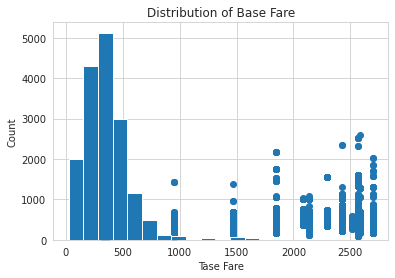

<ipython-input-91-63a064e78358>:52: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




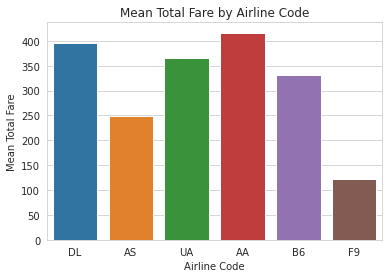

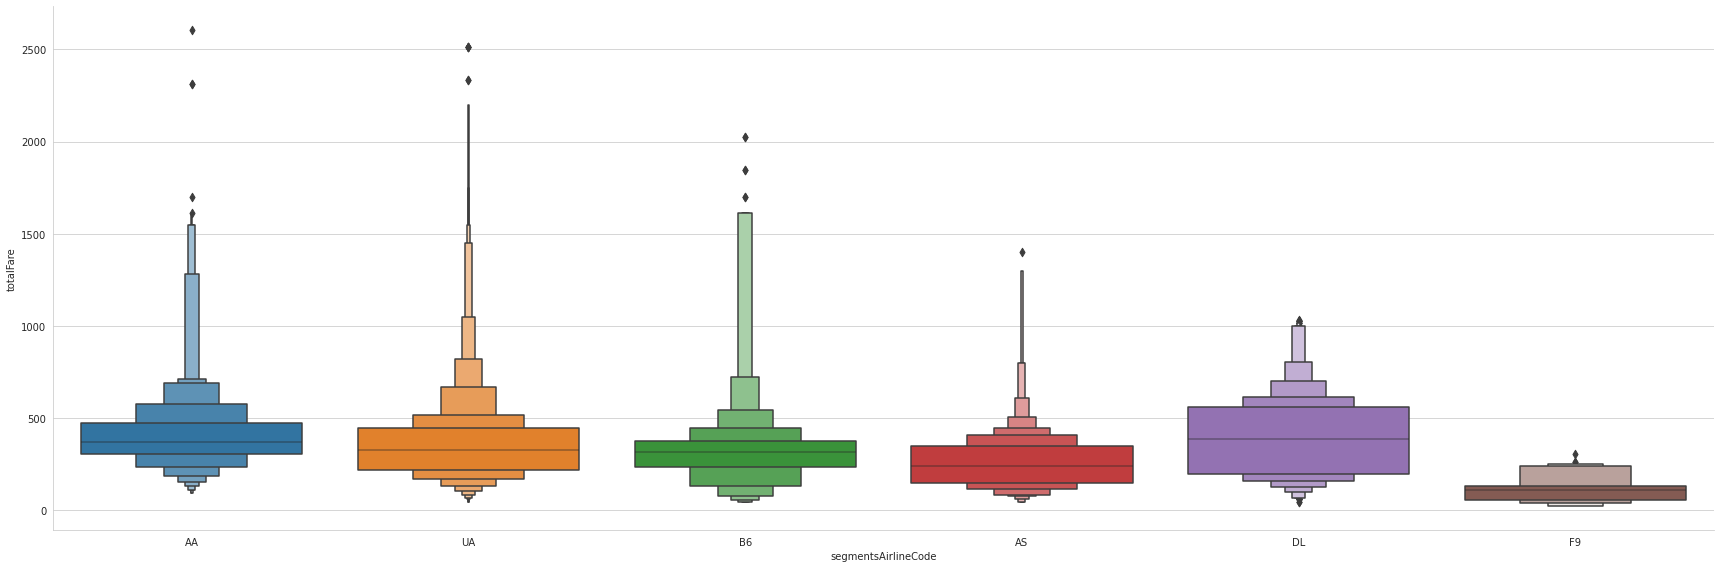

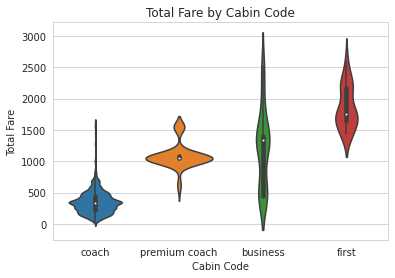

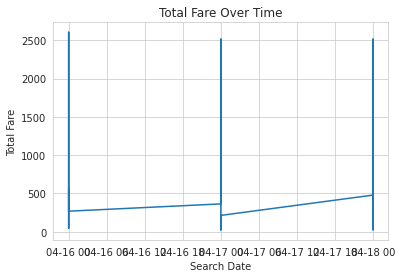

<ipython-input-91-63a064e78358>:80: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




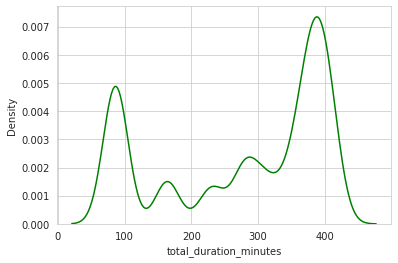

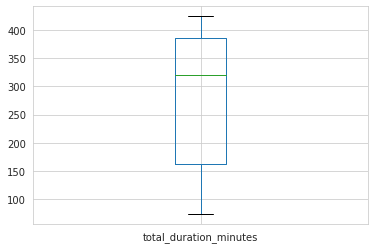

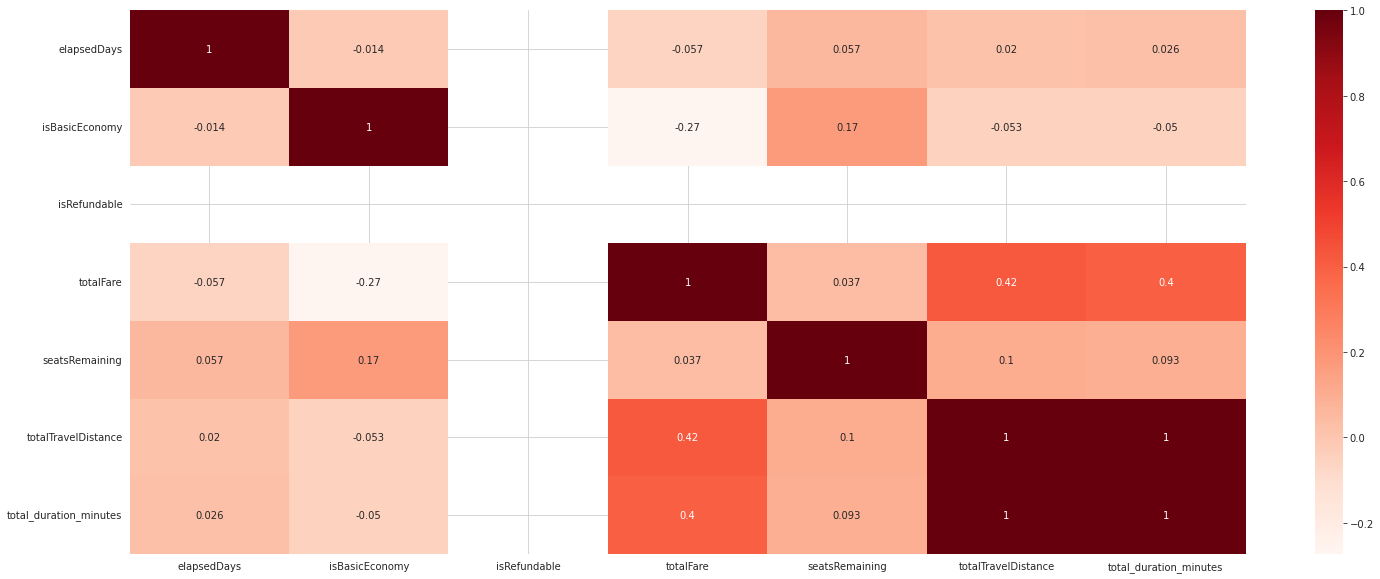

elapsedDays               0.057238
isBasicEconomy            0.272862
isRefundable                   NaN
totalFare                 1.000000
seatsRemaining            0.036657
totalTravelDistance       0.420602
total_duration_minutes    0.401887
Name: totalFare, dtype: float64

In [ ]:
# check the shape of the DataFrame
print("DataFrame shape:", df.shape)

# check the first 5 rows of the DataFrame
print(df.head())

# check for missing values
print("Missing values:")
print(df.isna().sum())

# check data types of each column
print("Data types:")
print(df.dtypes)

#check unique flights 
df['segmentsAirlineCode'].unique

airline_counts = df['segmentsAirlineCode'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Create horizontal bar chart of airline counts
airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

# check the summary statistics of numerical columns
print("Summary statistics:")
print(df.describe())

# Visualizations 

plt.scatter( df['totalTravelDistance'], df['totalFare'])
print("Total Travel Distance and Total Fare")

# Plot a histogram of the base fare
plt.hist(df['totalFare'], bins=20)
plt.xlabel('Tase Fare')
plt.ylabel('Count')
plt.title('Distribution of Base Fare')
plt.show()



# Plot a scatter plot of the base fare vs total travel distance using plotly
fig = px.scatter(df, x='totalFare', y='totalTravelDistance', hover_data=['startingAirport', 'destinationAirport'])
fig.show()

# Create a bar plot of the mean total fare by airline code
sns.barplot(x='segmentsAirlineCode', y='totalFare', data=df, ci=None)
plt.xlabel('Airline Code')
plt.ylabel('Mean Total Fare')
plt.title('Mean Total Fare by Airline Code')
plt.show()

#Price and Airline
sns.catplot(y = "totalFare", x = "segmentsAirlineCode", data = df.sort_values("totalFare", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

# Create a violin plot of the total fare by cabin code
sns.violinplot(x='segmentsCabinCode', y='totalFare', data=df)
plt.xlabel('Cabin Code')
plt.ylabel('Total Fare')
plt.title('Total Fare by Cabin Code')
plt.show()


# Create a line plot of the total fare over time
df['searchDate'] = pd.to_datetime(df['searchDate'])
df = df.sort_values(by='searchDate')
plt.plot(df['searchDate'], df['totalFare'])
plt.xlabel('Search Date')
plt.ylabel('Total Fare')
plt.title('Total Fare Over Time')
plt.show()

# checking distribution of the duration 
sns.distplot(df['total_duration_minutes'],hist = False,color = "green")
plt.show()

#  We can see that we have outliers in duration feature but we will not replace them
#  in place of replacing them we will reduce their effect as it is 
#  the real time, which is taken by flight from source and destination
df.boxplot(column ='total_duration_minutes')

# Create a scatter plot of the total fare vs travel duration using plotly
fig = px.scatter(df, x='total_duration_minutes', y='totalFare', hover_data=['startingAirport', 'destinationAirport'])
fig.show()

#Pearson Correlation 
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with target variable price
cor_target = abs(cor["totalFare"])

relevant_features = cor_target
relevant_features 

# Does ticket price change based on the departure time and arrival time?

We will run a linear regression to see if the departure time and arrival time variables are significant and how they affect the total price for each flight on average

In [ ]:
df_copy = df.copy() #we will make a copy of the original df so as to have the original df unmodified futher

In [ ]:
df_copy

,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineCode,segmentsEquipmentDescription,segmentsCabinCode,arrival_to_destination,Departure_Time_from_Origin,total_duration_minutes
14,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,0,False,False,558.60,6,2135,DL,Airbus A330-200,coach,21:34:00,19:15:00,319
3671,2022-04-16,2022-04-23,LAX,SFO,M0AKZRN1,0,False,False,318.60,7,339,AA,Embraer 175,coach,10:59:00,09:32:00,87
3670,2022-04-16,2022-04-23,LAX,SFO,M0AKZRN1,0,False,False,318.60,5,339,AA,Embraer 175,coach,23:41:00,22:15:00,86
3668,2022-04-16,2022-04-23,LAX,SFO,HH0OAVMN,0,False,False,268.60,4,339,AS,Boeing 737 MAX 9,coach,09:29:00,08:00:00,89
3667,2022-04-16,2022-04-23,LAX,SFO,HA0QA0MQ,0,False,False,248.60,4,339,DL,Embraer 175 (Enhanced Winglets),coach,09:42:00,08:15:00,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49618,2022-04-18,2022-05-05,JFK,SFO,KAA4PHBN,0,True,False,111.60,9,2566,UA,Boeing 757-200,coach,09:50:00,06:30:00,380
49614,2022-04-18,2022-05-05,IAD,SFO,UAA7AQEN,0,False,False,508.60,9,2426,UA,Boeing 737-900,coach,21:04:00,17:55:00,369
49610,2022-04-18,2022-05-05,IAD,SFO,QAA4AQEN,0,False,False,408.60,9,2426,UA,Boeing 737 MAX 9,coach,15:35:00,12:30:00,365
49626,2022-04-18,2022-05-05,JFK,SFO,UI4ABEL1,0,False,False,148.60,7,2566,B6,Airbus A319-321,coach,15:28:00,12:00:00,388


In [ ]:
#getting rid of tow more columns- destination airport as it will be SFO for all, elapsed days as it is mostly 0
df_copy = df_copy.drop(['destinationAirport', 'elapsedDays'], axis=1)

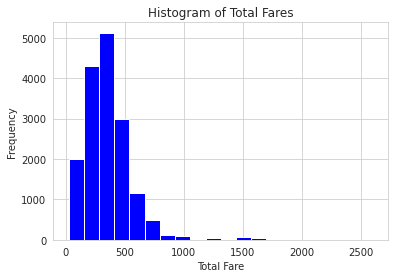

In [ ]:
#visualizing distribution of total fares
plt.hist(df_copy['totalFare'], bins=20, color='blue')
plt.xlabel('Total Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Total Fares')
plt.show()

In [ ]:
#As seen from the plot there is a slight positive skew to our graph

In [ ]:
# Convert categorical variables into dummy variables
df_copy = pd.get_dummies(df_copy, columns=['fareBasisCode','startingAirport', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsCabinCode'])
# Convert boolean variables into binary variables
df_copy['isBasicEconomy'] = df_copy['isBasicEconomy'].astype(int)
df_copy['isRefundable'] = df_copy['isRefundable'].astype(int)

# Extract year, month, and day from flightDate
df_copy['flightYear'] = df_copy['flightDate'].dt.year
df_copy['flightMonth'] = df_copy['flightDate'].dt.month
df_copy['flightDay'] = df_copy['flightDate'].dt.day

#Transform the data: Convert Departure_Time_from_Origin and arrival_to_destination columns to datetime format, and extract the hour and minute 
#components of the time.
df_copy['Departure_Time_from_Origin'] = pd.to_datetime(df_copy['Departure_Time_from_Origin'])
df_copy['arrival_to_destination'] = pd.to_datetime(df_copy['arrival_to_destination'])
df_copy['Departure_Hour'] = df_copy['Departure_Time_from_Origin'].dt.hour
df_copy['Departure_Minute'] = df_copy['Departure_Time_from_Origin'].dt.minute
df_copy['Arrival_Hour'] = df_copy['arrival_to_destination'].dt.hour
df_copy['Arrival_Minute'] = df_copy['arrival_to_destination'].dt.minute

# Extract day of the week from flightDate
df_copy['DayOfWeek'] = df_copy['flightDate'].dt.dayofweek

# Drop flightDate column and search date column
df_copy.drop(['flightDate', 'searchDate'], axis=1, inplace=True)

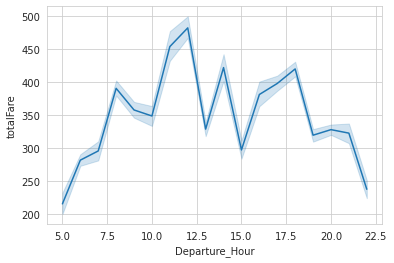

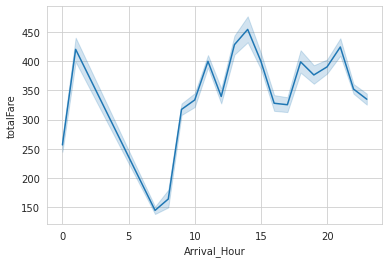

In [ ]:
#Visualize the data: Plot the ticket price against the departure and arrival times to identify any patterns or trends.
# plot ticket price against departure hour
sns.lineplot(x='Departure_Hour', y='totalFare', data=df_copy)
plt.show()

# plot ticket price against arrival hour
sns.lineplot(x='Arrival_Hour', y='totalFare', data=df_copy)
plt.show()

In [ ]:
#in our first linear regression model, we will only select the departrue and arrival time variables
# select features and target variable
X = df_copy[['Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute']]
y = df_copy['totalFare']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2 score:', r2)

MSE: 47896.87327485442
R2 score: 0.02093113254370449


In [ ]:
# Calculate p-values using statsmodels
X_train = sm.add_constant(X_train) # add a constant term for the intercept
model_sm = sm.OLS(y_train, X_train).fit()
p_values = model_sm.summary2().tables[1]['P>|t|']

# Print p-values
print(p_values)

const               0.000000e+00
Departure_Hour      6.713814e-16
Departure_Minute    4.965325e-01
Arrival_Hour        2.557836e-42
Arrival_Minute      1.943883e-03
Name: P>|t|, dtype: float64


In [ ]:
# get the coefficients of the model
coefficients = pd.DataFrame({'features': X.columns, 'coefficients': model.coef_})
print(coefficients)


           features  coefficients
0    Departure_Hour     -4.092342
1  Departure_Minute      0.071544
2      Arrival_Hour      6.230069
3    Arrival_Minute      0.327154


In [ ]:
#the feature 'Departure_Hour' has a negative coefficient of  -4.280101, which means that as the departure hour increases, 
#the ticket price tends to decrease. 

#On the other hand, 'Arrival_Hour' has a positive coefficient of  6.417603, indicating that as the arrival hour increases, the 
#ticket price tends to increase. The feature 'Arrival_Minute' also has a positive coefficient of 0.345, suggesting that as the arrival minute increases, the ticket price tends to increase slightly.

#Overall, the coefficients suggest that departure time and arrival time have a moderate influence on the ticket price. However, 
#it's important to note that the R2 score is low, indicating that the model does not explain much of the variance in the ticket prices. Therefore, further analysis or feature engineering may be necessary to improve the model'

In [ ]:
#Next, we will first create another  regression with all covariates to get a even better estimate of the impact of
#departure and arrival time to the total fare. Since we are using all covariates, we will use LASSO for important feature selection and to avoid overfitting

In [ ]:
X_2 = df_copy.drop(['Departure_Time_from_Origin', 'arrival_to_destination', 'totalFare'], axis=1)
Y_2 = df_copy['totalFare']

In [ ]:
from sklearn.linear_model import Lasso

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)

# train the model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2 score:', r2)


MSE: 3048.3638321272333
R2 score: 0.9376878296921645


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.677e+07, tolerance: 6.042e+04



In [ ]:
#The MSE and R2 have improved a lot using the lasso regression on all covariates vs using least squares linear regression on only the 
#arrival and departure times

In [ ]:
# get the coefficients 
# get the coefficients
coef = model.coef_

# create a dictionary to map feature names to coefficients
coef_dict = dict(zip(X.columns, coef))

# print the coefficients for selected features
print("Departure_Hour coefficient:", coef_dict['Departure_Hour'])
print("Departure_Minute coefficient:", coef_dict['Departure_Minute'])
print("Arrival_Hour coefficient:", coef_dict['Arrival_Hour'])
print("Arrival_Minute coefficient:", coef_dict['Arrival_Minute'])

Departure_Hour coefficient: -130.81294711267222
Departure_Minute coefficient: 0.0
Arrival_Hour coefficient: 1.2962401245127504
Arrival_Minute coefficient: 0.1384938308459148


In [ ]:
#The coefficient for 'Departure_Hour' is --130.81.89, which means that for each increase of 1 hour in the departure time, 
#the predicted flight price will decrease by $130.8, holding all other variables constant. This is a huge change compared to the 
#first model using only 4 covariates

#The coefficient for 'Arrival_Hour' is 1.29, which means that for each increase of 1 hour in the arrival time, 
#the predicted flight price will increase by $1.29, holding all other variables constant.



# How prices changes as number of days before flight date changes

In [ ]:
df_2 = df.copy() #we will make another copy of the original df

In [ ]:
# Convert flightDate to datetime format
df_2['flightDate'] = pd.to_datetime(df_2['flightDate'], format='%Y-%m-%d')

# Calculate number of days before flight date
df_2['days_before_flight'] = (df_2['flightDate'] - df_2['searchDate']).dt.days

# Create linear regression model
X = df_2[['days_before_flight']]
y = df_2['totalFare']
reg = LinearRegression().fit(X, y)

# Print the coefficients of the linear regression model
print('Coefficients:', reg.coef_)

#In this code, we first convert the flightDate column to datetime format, and then calculate the number of days before the flight 
#date for each row using the current date as a reference point.
#We then create a linear regression model with Days_Before_Flight as the feature and totalFare as the target variable.
#The fit method is used to train the linear regression model on the training data.
#Finally, we print the coefficients of the linear regression model to see the relationship between the number of days before 
#the flight date and ticket prices. This will tell us how much ticket prices change as we move closer to the flight date.

Coefficients: [-0.44800165]


In [ ]:
#The coefficient value of -0.44800165 represents the slope of the linear regression line between the feature variable (days before flight) 
#and the target variable (total fare). Specifically, it tells us how much the total fare is expected to decrease for each unit increase 
#in the number of days before the flight. In this case, a coefficient of -0.44800165 suggests that the ticket prices decrease as the 
#number of days before the flight increases.

#However, it is important to note that the coefficient only represents the relationship between the two variables and cannot establish causation. Other factors, such as demand and availability, may also affect the ticket prices.

# How does price change with source and destination? 



The price of flight from LAX to SFO is the least expensive whereas the flights from CLT to SFO and MIA to SFO are the most expensive


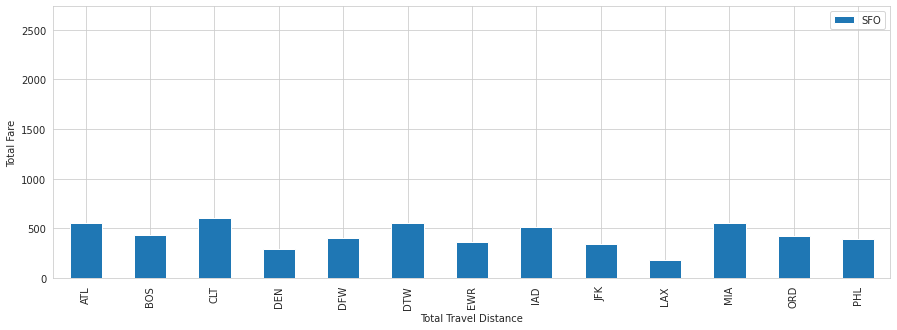

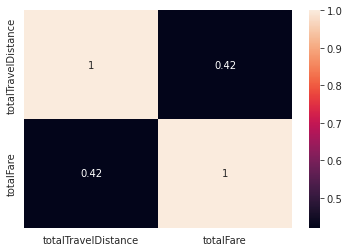

The correlation plot with a correlation coefficient of 0.2 between total travel distance between starting airport and destination airport indicates a weak positive correlation between the two variables being analyzed. It suggests that as total travel distance variable increases, the price also tends to increase, but the relationship between the two is not very strong.


In [ ]:
#creating a new df copy to avoid making chnages to the original one 
df_6 = df.copy()

#create pivot table with aiports: origin and destination with total fare 
pd.pivot_table(data = df,columns = "destinationAirport",index = "startingAirport", values = "totalFare")

# Plotting the information regarding price variance between cities
plot_fare_dest = pd.crosstab(columns = df_6["destinationAirport"],index = df_6["startingAirport"], values = df_6["totalFare"], aggfunc="mean")
plot_fare_dest.plot(kind = "bar",figsize = (15,5))
print("The price of flight from LAX to SFO is the least expensive whereas the flights from CLT to SFO and MIA to SFO are the most expensive")

# Plot a scatter plot between total travel distance and total fare
sns.scatterplot(x="totalTravelDistance", y="totalFare", data=df)
plt.xlabel("Total Travel Distance")
plt.ylabel("Total Fare")
plt.show()

# Compute the correlation matrix
corr = df[["totalTravelDistance", "totalFare"]].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)
plt.show()
print("The correlation plot with a correlation coefficient of 0.2 between total travel distance between starting airport and destination airport indicates a weak positive correlation between the two variables being analyzed. It suggests that as total travel distance variable increases, the price also tends to increase, but the relationship between the two is not very strong.")

In [ ]:
# Encode destination and  startingAirport as numeric values
airports = df_6['startingAirport'].unique()
airport_map = {airport: i for i, airport in enumerate(airports)}
df_6['origin_code'] = df_6['startingAirport'].map(airport_map)

destinations = df_6['destinationAirport'].unique()
destination_map = {dest: i for i, dest in enumerate(destinations)}
df_6['destination_code'] = df_6['destinationAirport'].map(destination_map)

# Split data into training and testing sets
train_data = df_6.sample(frac=0.8, random_state=42)
test_data = df_6.drop(train_data.index)

# Train linear regression model
model = LinearRegression()
features = ['origin_code', 'destination_code']
target = 'totalFare'
model.fit(train_data[features], train_data[target])

# Evaluate model on test data
predictions = model.predict(test_data[features])
error = predictions - test_data[target]
mean_absolute_error = error.abs().mean()
print(f'Mean absolute error: {mean_absolute_error:.2f}')
#Intercept
print('Intercept: ', model.intercept_)
# regression coefficients
print('Coefficients: ', model.coef_)

print("The absence of a meaningful correlation between the destination airport and the flight price is shown by the 0 coefficient for the destination airport code.However, we know there are several factors that come in to play when predicting total fare thus the main reason for regression was to understand correlation and significance of sole variables")

Mean absolute error: 141.12
Intercept:  295.1936512942496
Coefficients:  [12.61832479  0.        ]
The absence of a meaningful correlation between the destination airport and the flight price is shown by the 0 coefficient for the destination airport code.However, we know there are several factors that come in to play when predicting total fare thus the main reason for regression was to understand correlation and significance of sole variables


# Does ticket price change based on the day of week/ week of month ?

In [ ]:
#creating a new df copy to avoid making chnages to the original one 
df_c1 = df.copy()

In [ ]:
df_c1

,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineCode,segmentsEquipmentDescription,segmentsCabinCode,arrival_to_destination,Departure_Time_from_Origin,total_duration_minutes
14,2022-04-16,2022-04-17,ATL,SFO,MA0QA0MQ,0,False,False,558.60,6,2135,DL,Airbus A330-200,coach,21:34:00,19:15:00,319
3671,2022-04-16,2022-04-23,LAX,SFO,M0AKZRN1,0,False,False,318.60,7,339,AA,Embraer 175,coach,10:59:00,09:32:00,87
3670,2022-04-16,2022-04-23,LAX,SFO,M0AKZRN1,0,False,False,318.60,5,339,AA,Embraer 175,coach,23:41:00,22:15:00,86
3668,2022-04-16,2022-04-23,LAX,SFO,HH0OAVMN,0,False,False,268.60,4,339,AS,Boeing 737 MAX 9,coach,09:29:00,08:00:00,89
3667,2022-04-16,2022-04-23,LAX,SFO,HA0QA0MQ,0,False,False,248.60,4,339,DL,Embraer 175 (Enhanced Winglets),coach,09:42:00,08:15:00,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49618,2022-04-18,2022-05-05,JFK,SFO,KAA4PHBN,0,True,False,111.60,9,2566,UA,Boeing 757-200,coach,09:50:00,06:30:00,380
49614,2022-04-18,2022-05-05,IAD,SFO,UAA7AQEN,0,False,False,508.60,9,2426,UA,Boeing 737-900,coach,21:04:00,17:55:00,369
49610,2022-04-18,2022-05-05,IAD,SFO,QAA4AQEN,0,False,False,408.60,9,2426,UA,Boeing 737 MAX 9,coach,15:35:00,12:30:00,365
49626,2022-04-18,2022-05-05,JFK,SFO,UI4ABEL1,0,False,False,148.60,7,2566,B6,Airbus A319-321,coach,15:28:00,12:00:00,388


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

df_c1['weekday'] = df_c1['flightDate'].dt.dayofweek
df_c1['day'] = df_c1['flightDate'].dt.day

# Convert categorical variables into dummy variables
df_c1 = pd.get_dummies(df_c1, columns=['fareBasisCode','startingAirport', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsCabinCode'])
# Convert boolean variables into binary variables
df_c1['isBasicEconomy'] = df_c1['isBasicEconomy'].astype(int)
df_c1['isRefundable'] = df_c1['isRefundable'].astype(int)


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

exclude_cols = ['totalFare','searchDate','flightDate', 'destinationAirport', 'elapsedDays', 'Departure_Time_from_Origin', 'arrival_to_destination'] #drop non-numeric columns
X = df_c1.drop(exclude_cols, axis=1) #input variables
y = df_c1['totalFare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Set penalties of variables of interest to 0
feature_names = list(X.columns)
a = []
for i in range(len(feature_names)):
  if feature_names[i] in ['weekday','day']: a.append(0)
  else: a.append(0.1)

a_array = np.array(a)

# Defining Lasso regression model
lasso_reg = Lasso(alpha=0.1, fit_intercept=True)

# Fitting the model on the training data
lasso_reg.fit(X_train, y_train)

# Count the number of nonzero coefficients
print("Number of nonzero coefficients: ",str(np.count_nonzero(lasso_reg.coef_)))

# Predicting the target variable for test data
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))

Number of nonzero coefficients:  541
Mean squared error: 1230.17
R2 score: 0.97


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+05, tolerance: 6.042e+04



In [ ]:
print(a_array)

[0.1 0.1 0.1 0.1 0.1 0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.

In [ ]:
# get feature names from the dataset
feature_names = list(X.columns) #store variable names in a list
nonzero_coef_names = [] #initialize list
nonzero_coef_values = []

print("Nonzero coefficients:")
for i in range(len(feature_names)):
  if lasso_reg.coef_[i] != 0: 
    nonzero_coef_names.append(feature_names[i]) #append nonzero coefficient names in list
    nonzero_coef_values.append(lasso_reg.coef_[i]) #append nonzero coefficient values in list
    print(feature_names[i],' ',str(round(lasso_reg.coef_[i],4)))


Nonzero coefficients:
isBasicEconomy   -32.5307
seatsRemaining   0.9097
totalTravelDistance   35.4081
weekday   0.7149
day   0.892
fareBasisCode_B0AJZNN1   28.0832
fareBasisCode_B0AKZRN1   27.0328
fareBasisCode_B0APZNN1   5.4492
fareBasisCode_B3AKZNN1   -1.9015
fareBasisCode_B7AKZNN1   -2.6599
fareBasisCode_B7APZNN1   3.9767
fareBasisCode_B7AZZNN1   -1.6521
fareBasisCode_BA0NA0MQ   5.9513
fareBasisCode_BA0OA0MQ   5.9823
fareBasisCode_BA3OA0MC   2.8418
fareBasisCode_BA7OA0MC   7.6407
fareBasisCode_BA7OA0MQ   9.3068
fareBasisCode_BAA0AFEM   28.7514
fareBasisCode_BAA0AFEN   18.8064
fareBasisCode_BAA0AFIN   2.5321
fareBasisCode_BATOA0MQ   5.1808
fareBasisCode_BAUOA0MC   2.2002
fareBasisCode_BAUOA0MQ   16.2466
fareBasisCode_BAUOA5MQ   3.2295
fareBasisCode_BAVOA0MQ   10.4139
fareBasisCode_BC0AUEL1   -0.004
fareBasisCode_BH0OASM   9.2263
fareBasisCode_BH0OASMN   5.494
fareBasisCode_BH3AUEL1   6.6862
fareBasisCode_BUAKZRN1   -2.6294
fareBasisCode_C7ATZNJC   18.0804
fareBasisCode_CAA0AFFY   3.5

b) How is the price affected when tickets are bought just 1 or 2 days before departure?

In [ ]:
df_c3 = df.copy() #we will make a copy of the original df so as to have the original df unmodified futher

In [ ]:
# calculate the difference between the dates
df_c3['date_diff'] = (df_c3['searchDate'] - df_c3['flightDate']).abs()

# create a calculated field to check if the difference is within 2 days
df_c3['within_2_days'] = df_c3['date_diff'].apply(lambda x: 1 if x.days <= 2 else 0)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#exclude_cols = ['totalFare','legId','searchDate','flightDate','travelDuration','segmentsDepartureTimeEpochSeconds','segmentsDepartureTimeRaw','segmentsArrivalTimeEpochSeconds','segmentsArrivalTimeRaw','segmentsDurationInSeconds','segmentsDistance', 'weekday', 'day','date_diff'] #drop non-numeric columns
#X = df.drop(exclude_cols, axis=1) #input variables
#y = pd.DataFrame(df, columns = ['totalFare'])

# Convert categorical variables into dummy variables
df_c3 = pd.get_dummies(df_c3, columns=['fareBasisCode','startingAirport', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsCabinCode'])
# Convert boolean variables into binary variables
df_c3['isBasicEconomy'] = df_c3['isBasicEconomy'].astype(int)
df_c3['isRefundable'] = df_c3['isRefundable'].astype(int)


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

exclude_cols = ['totalFare','searchDate','flightDate', 'destinationAirport', 'elapsedDays', 'Departure_Time_from_Origin', 'arrival_to_destination', 'date_diff'] #drop non-numeric columns
X = df_c3.drop(exclude_cols, axis=1) #input variables
y = df_c3['totalFare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining Lasso regression model
lasso_reg = Lasso(alpha=0.1)

# Fitting the model on the training data
lasso_reg.fit(X_train, y_train)

# Count the number of nonzero coefficients
print("Number of nonzero coefficients: ",str(np.count_nonzero(lasso_reg.coef_)))

# Predicting the target variable for test data
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: {:.2f}".format(mse))
print("R2 score: {:.2f}".format(r2))

Number of nonzero coefficients:  539
Mean squared error: 1235.52
R2 score: 0.97


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e+05, tolerance: 6.042e+04



In [ ]:
# get feature names from the dataset
feature_names = list(X.columns) #store variable names in a list
nonzero_coef_names = [] #initialize list
nonzero_coef_values = []

print("Nonzero coefficients:")
for i in range(len(feature_names)):
  if lasso_reg.coef_[i] != 0: 
    nonzero_coef_names.append(feature_names[i]) #append nonzero coefficient names in list
    nonzero_coef_values.append(lasso_reg.coef_[i]) #append nonzero coefficient values in list
    print(feature_names[i],' ',str(round(lasso_reg.coef_[i],4)))

Nonzero coefficients:
isBasicEconomy   -32.5043
seatsRemaining   0.837
totalTravelDistance   35.4872
within_2_days   -0.0723
fareBasisCode_B0AJZNN1   28.1133
fareBasisCode_B0AKZRN1   27.0747
fareBasisCode_B0APZNN1   5.4434
fareBasisCode_B3AKZNN1   -1.8825
fareBasisCode_B7AKZNN1   -2.6381
fareBasisCode_B7APZNN1   3.9567
fareBasisCode_B7AZZNN1   -1.6512
fareBasisCode_BA0NA0MQ   5.986
fareBasisCode_BA0OA0MQ   5.9883
fareBasisCode_BA3OA0MC   2.8533
fareBasisCode_BA7OA0MC   7.6222
fareBasisCode_BA7OA0MQ   9.3195
fareBasisCode_BAA0AFEM   28.7406
fareBasisCode_BAA0AFEN   18.8127
fareBasisCode_BAA0AFIN   2.5205
fareBasisCode_BATOA0MQ   5.1943
fareBasisCode_BAUOA0MC   2.2112
fareBasisCode_BAUOA0MQ   16.2586
fareBasisCode_BAUOA5MQ   3.2396
fareBasisCode_BAVOA0MQ   10.4243
fareBasisCode_BH0OASM   9.2507
fareBasisCode_BH0OASMN   5.5313
fareBasisCode_BH3AUEL1   6.7218
fareBasisCode_BUAKZRN1   -2.6553
fareBasisCode_C7ATZNJC   18.0926
fareBasisCode_CAA0AFFY   3.6085
fareBasisCode_CH0ANE   14.693
fare

# MODEL SELECTION: PRICE PREDICTION 
Using Linear regression, xgboost, decision tree and random forest

In [ ]:
#PART 1
#CART AND RF TO DETERMINE IMPORTANT FEATURES IN PREDICTING PRICE

In [ ]:
df_ = df.copy() #making another copy of the original dataframe 

In [ ]:
df_ = df_.drop(['destinationAirport', 'elapsedDays'], axis=1)

In [ ]:
#converting date to numerical representation
# Extract year, month, day, hour, and minute
df_['year'] = df_['flightDate'].dt.year
df_['month'] = df_['flightDate'].dt.month

#converting times to numerical representation
#Transform the data: Convert Departure_Time_from_Origin and arrival_to_destination columns to datetime format, and extract the hour and minute 
#components of the time.
df_['Departure_Time_from_Origin'] = pd.to_datetime(df_['Departure_Time_from_Origin'])
df_['arrival_to_destination'] = pd.to_datetime(df_['arrival_to_destination'])
df_['Departure_Hour'] = df_['Departure_Time_from_Origin'].dt.hour
df_['Departure_Minute'] = df_['Departure_Time_from_Origin'].dt.minute
df_['Arrival_Hour'] = df_['arrival_to_destination'].dt.hour
df_['Arrival_Minute'] = df_['arrival_to_destination'].dt.minute

df_.drop(['Departure_Time_from_Origin', 'arrival_to_destination', 'flightDate', 'searchDate'

         ], axis=1, inplace=True)

# Convert categorical variables into dummy variables
df_ = pd.get_dummies(df_, columns=['fareBasisCode','startingAirport', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsCabinCode'])
# Convert boolean variables into binary variables
df_['isBasicEconomy'] = df_['isBasicEconomy'].astype(int)
df_['isRefundable'] = df_['isRefundable'].astype(int)

#REGRESSION TREE
# Define input and target variables
X = df_.drop('totalFare', axis=1)
y = df_['totalFare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11)
}

# Create a decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Fit the model using the best hyperparameters and evaluate it using cross-validation
tree_reg = grid_search.best_estimator_
scores = cross_val_score(tree_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("Cross-validation scores: ", rmse_scores)
print("Mean cross-validation score: ", rmse_scores.mean())

# Calculate the MSE on the test set
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE on test set: ", mse)

# Calculate the mean squared error of the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Cross-validation scores:  [ 98.76615992 109.35722714 108.38949024 104.91693539 105.99719599]
Mean cross-validation score:  105.48540173627403
MSE on test set:  10134.91052045525
Mean squared error: 10392.773457370464


In [ ]:
#RANDOM FOREST
# create random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# fit model and perform cross validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: ", -cv_scores)
print("Average MSE: ", -cv_scores.mean())

# fit the model on the entire data
rf.fit(X, y)

# print feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Cross-validation scores:  [ 861.86136448 2273.06947406  358.69959274 3578.30438877  601.45632446]
Average MSE:  1534.678228901312
Feature ranking:
1. feature 4 (0.229033)
2. feature 595 (0.161412)
3. feature 537 (0.087622)
4. feature 538 (0.068349)
5. feature 0 (0.049476)
6. feature 539 (0.037630)
7. feature 536 (0.021989)
8. feature 565 (0.019492)
9. feature 542 (0.012831)
10. feature 12 (0.012524)
11. feature 597 (0.009480)
12. feature 556 (0.009140)
13. feature 225 (0.007934)
14. feature 53 (0.007534)
15. feature 420 (0.007446)
16. feature 222 (0.007065)
17. feature 8 (0.006254)
18. feature 82 (0.006238)
19. feature 541 (0.006174)
20. feature 223 (0.006102)
21. feature 80 (0.006024)
22. feature 60 (0.006016)
23. feature 56 (0.005914)
24. feature 3 (0.005651)
25. feature 11 (0.005480)
26. feature 543 (0.005328)
27. feature 224 (0.005275)
28. feature 557 (0.005182)
29. feature 564 (0.004702)
30. feature 28 (0.004386)
31. feature 55 (0.004342)
32. feature 123 (0.004148)
33. feature 54 

In [ ]:
#Identifying important features

# create a dictionary of feature names and their importance values
importances = dict(zip(X_train.columns, rf.feature_importances_))

# sort the dictionary by importance value in descending order
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# print the feature rankings
print('Feature ranking:')
for i, (feature, importance) in enumerate(sorted_importances):
    print(f"{i+1}. {feature} ({importance:.6f})")

Feature ranking:
1. total_duration_minutes (0.229033)
2. segmentsCabinCode_coach (0.161412)
3. fareBasisCode_YA2AA (0.087622)
4. fareBasisCode_YA2AAN (0.068349)
5. isBasicEconomy (0.049476)
6. fareBasisCode_YAA0AFEY (0.037630)
7. fareBasisCode_Y0N (0.021989)
8. segmentsAirlineCode_DL (0.019492)
9. fareBasisCode_YH0KUEY5 (0.012831)
10. fareBasisCode_B0AKZRN1 (0.012524)
11. segmentsCabinCode_premium coach (0.009480)
12. startingAirport_IAD (0.009140)
13. fareBasisCode_MAA0OQEN (0.007934)
14. fareBasisCode_EAA0OHEN (0.007534)
15. fareBasisCode_UAA0OKEN (0.007446)
16. fareBasisCode_MAA0OHEN (0.007065)
17. Departure_Minute (0.006254)
18. fareBasisCode_H7AKZRN1 (0.006238)
19. fareBasisCode_YH0JUEY5 (0.006174)
20. fareBasisCode_MAA0OKEN (0.006102)
21. fareBasisCode_H0AKZRN1 (0.006024)
22. fareBasisCode_EH0KUEL1 (0.006016)
23. fareBasisCode_EAA0PKEY (0.005914)
24. totalTravelDistance (0.005651)
25. fareBasisCode_B0AJZNN1 (0.005480)
26. fareBasisCode_YH0OASMR (0.005328)
27. fareBasisCode_MAA0OK

In [ ]:
# PART 2
#CREATING FUNCTION TO PERFORM LILinear regression, xgboost, decision tree and random forest
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
#We will use the df_ dataset from previous part

X = df_.drop('totalFare', axis=1)
y = df_['totalFare']

# splitting the data for training as well as testing purpose with 80:20 split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#Defining a function that fits all models and outputs all regression metrics for both training and testing 
def get_prediction(model):
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    r2_tr  = r2_score(y_train,y_pred)
    y_pred1 = model.predict(x_test)
    r2_te  = r2_score(y_test,y_pred1)
    rmse = np.sqrt(MSE(y_test, y_pred1))
    return print(f"""At Training: \nR2_Score: {r2_tr} \nRMSE: {rmse} \nCVScore: {scores}
    \nAt Testing: \nR2_Score: {r2_te} \nRMSE: {rmse} \nCVScore: {scores}""")

#  WITHOUT SCALING 
# Regress using linear regression, decision tree, random forest and xgboost 
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor()),
      ("XG Boost",xgb.XGBRegressor())]

#print outputs 
for name,model in lst:
    print(f"The Performance of {name} without Scaling::")
    get_prediction(model)
    print("*"*50)


The Performance of Linear Regression without Scaling::
At Training: 
R2_Score: 0.9879715910332258 
RMSE: 222554.25426229605 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
    
At Testing: 
R2_Score: -1012459.0102069393 
RMSE: 222554.25426229605 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
**************************************************
The Performance of Decision Tree without Scaling::
At Training: 
R2_Score: 0.9993973692992519 
RMSE: 17.7288723356777 
CVScore: [0.984754   0.91534863 0.99340593 0.88116627 0.97837383]
    
At Testing: 
R2_Score: 0.9935750714402685 
RMSE: 17.7288723356777 
CVScore: [0.984754   0.91534863 0.99340593 0.88116627 0.97837383]
**************************************************
The Performance of Random Forest without Scaling::
At Training: 
R2_Score: 0.9979374036112008 
RMSE: 18.997418975044816 
CVScore: [0.98290428 0.93266735 0.99345319 0.91441847 0.98982865]
    

In [ ]:
# WITH SCALING 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = pd.DataFrame(std.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(std.transform(x_test),columns = x_test.columns)

#  WITH SCALING 
# Regress using linear regression, decision tree, random forest and xgboost 
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor()),
      ("XG Boost",xgb.XGBRegressor())]

for name,model in lst:
    print(f"The Performance of {name} with Scaling::")
    get_prediction(model)
    print("*"*50)


The Performance of Linear Regression with Scaling::
At Training: 
R2_Score: 0.9879568697342577 
RMSE: 81251836064560.73 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
    
At Testing: 
R2_Score: -1.349498620086136e+23 
RMSE: 81251836064560.73 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
**************************************************
The Performance of Decision Tree with Scaling::
At Training: 
R2_Score: 0.9993973692992519 
RMSE: 17.788357522297545 
CVScore: [0.98586762 0.91320602 0.99346219 0.86991282 0.9772727 ]
    
At Testing: 
R2_Score: 0.9935318843452752 
RMSE: 17.788357522297545 
CVScore: [0.98586762 0.91320602 0.99346219 0.86991282 0.9772727 ]
**************************************************
The Performance of Random Forest with Scaling::
At Training: 
R2_Score: 0.9978332763906329 
RMSE: 18.901173261538084 
CVScore: [0.98267016 0.93464581 0.9934619  0.92061101 0.98852177]
    
At 

In [ ]:
# INTERPRETATION ON MODEL SELECTION 
'''
Based on above all four models - Linear Regression, Decision Tree, Random Forest, and XG Boost seem to perform well on the training and testing data. 
Some key differences for each : 

Linear Regression has very high R^2 of 0.98 for training, however it is not performing well at testing with a negative R^2 value. The RMSE value is the highest among all indicating low to no accuracy in predictng flight prices. Thus, Linear Regression is not the most reliable model
Decision Tree has a perfect R^2 of  0.99 out of sample R^2. The RMSE for the same is 19.98 which is compareable to few other models but we can conclude that decision tree is a better fit as compared to Linear regression
Random Forest also has a very high R^2 of 0.99 similar to decision tree. The RMSE is the lowest with about 18.96 indicating the model is doing a better job at predicting total fare on unseen data. 
XGBoost also has a lower R^2 as compared to decision tree and random forest with 0.96 with a higher RMSE when compared to Decision Tree and Random Forest indicating a its not the best choice of model.


Random Forest is the best model predictor out of those explored to predict total fare 
'''

'\nBased on above all four models - Linear Regression, Decision Tree, Random Forest, and XG Boost seem to perform well on the training and testing data. \nSome key differences for each : \n\nLinear Regression has very high R^2 of 0.98 for training, however it is not performing well at testing with a negative R^2 value. The RMSE value is the highest among all indicating low to no accuracy in predictng flight prices. Thus, Linear Regression is not the most reliable model\nDecision Tree has a perfect R^2 of  0.99 out of sample R^2. The RMSE for the same is 19.98 which is compareable to few other models but we can conclude that decision tree is a better fit as compared to Linear regression\nRandom Forest also has a very high R^2 of 0.99 similar to decision tree. The RMSE is the lowest with about 18.96 indicating the model is doing a better job at predicting total fare on unseen data. \nXGBoost also has a lower R^2 as compared to decision tree and random forest with 0.96 with a higher RMSE 

The Performance of Linear Regression without Scaling::


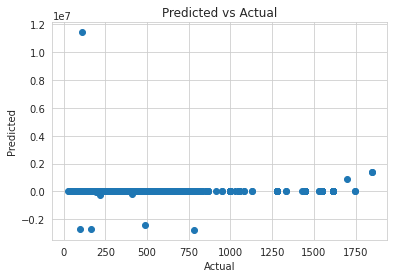

At Training: 
R2_Score: 0.9879715910332258 
RMSE: 222554.25426229605 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
    
At Testing: 
R2_Score: -1012459.0102069393 
RMSE: 222554.25426229605 
MAE: 7931.016407995358 
EVS: -1012428.3307764292 
CVScore: [-1.53168421e+02 -8.61534159e+04 -2.54780925e+05 -2.47622127e+04
 -4.90851624e+03]
**************************************************
The Performance of Decision Tree without Scaling::


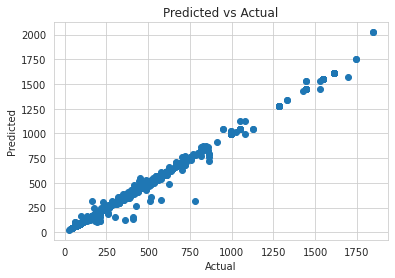

At Training: 
R2_Score: 0.9993973692992519 
RMSE: 17.77564699937776 
CVScore: [0.98520613 0.91537856 0.99343659 0.88354883 0.97842048]
    
At Testing: 
R2_Score: 0.9935411245193406 
RMSE: 17.77564699937776 
MAE: 3.5115735972640465 
EVS: 0.9935526953915783 
CVScore: [0.98520613 0.91537856 0.99343659 0.88354883 0.97842048]
**************************************************
The Performance of Random Forest without Scaling::


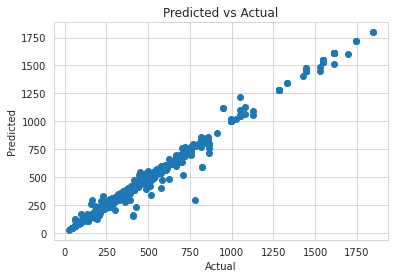

At Training: 
R2_Score: 0.9980474989017009 
RMSE: 18.75550741642471 
CVScore: [0.98273439 0.93539736 0.99336658 0.93484122 0.98986128]
    
At Testing: 
R2_Score: 0.9928094234526739 
RMSE: 18.75550741642471 
MAE: 4.862974641470343 
EVS: 0.9928446411178963 
CVScore: [0.98273439 0.93539736 0.99336658 0.93484122 0.98986128]
**************************************************
The Performance of XG Boost without Scaling::


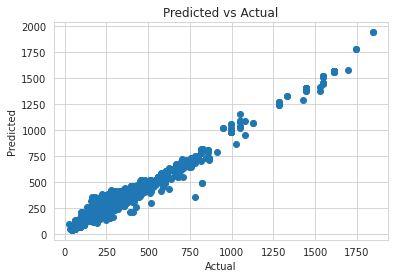

At Training: 
R2_Score: 0.967679748324529 
RMSE: 40.76175803308338 
CVScore: [0.95978655 0.89511306 0.96645353 0.78913806 0.9550528 ]
    
At Testing: 
R2_Score: 0.9660365428437274 
RMSE: 40.76175803308338 
MAE: 30.175914812772305 
EVS: 0.9660689405243843 
CVScore: [0.95978655 0.89511306 0.96645353 0.78913806 0.9550528 ]
**************************************************


In [ ]:
#some additional metrics that we can calculate and plot for each model:

import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, explained_variance_score as EVS
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#We will use the df_ dataset from previous part

X = df_.drop('totalFare', axis=1)
y = df_['totalFare']

# splitting the data for training as well as testing purpose with 80:20 split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#Defining a function that fits all models and outputs all regression metrics for both training and testing 
def get_prediction(model):
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    r2_tr  = r2_score(y_train,y_pred)
    y_pred1 = model.predict(x_test)
    r2_te  = r2_score(y_test,y_pred1)
    rmse = np.sqrt(MSE(y_test, y_pred1))
    mae = MAE(y_test, y_pred1) #Mean Absolute Error (MAE): This is the average absolute difference between the predicted and actual values. It gives an idea of how far off the predictions are from the actual values.
    evs = EVS(y_test, y_pred1) #Explained Variance Score (EVS): This is the proportion of variance in the target variable that can be explained by the model. It gives an idea of how well the model is able to capture the underlying patterns in the data. 
    
    # Plot predicted vs actual values
    plt.scatter(y_test, y_pred1)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual')
    plt.show()
    
    return print(f"""At Training: \nR2_Score: {r2_tr} \nRMSE: {rmse} \nCVScore: {scores}
    \nAt Testing: \nR2_Score: {r2_te} \nRMSE: {rmse} \nMAE: {mae} \nEVS: {evs} \nCVScore: {scores}""")

#  WITHOUT SCALING 
# Regress using linear regression, decision tree, random forest and xgboost 
lst = [("Linear Regression",LinearRegression()),("Decision Tree",DecisionTreeRegressor()),
      ("Random Forest",RandomForestRegressor()),
      ("XG Boost",xgb.XGBRegressor())]


#print outputs 
for name,model in lst:
    print(f"The Performance of {name} without Scaling::")
    get_prediction(model)
    print("*"*50)


In [ ]:
#For Linear Regression, the model's R2 score is 0.98 for the training set and a negative value of -1012459.01 for the testing set. This suggests that 
#the model is overfitting, as the R2 score for the testing set is negative, which implies that the model is performing worse than a random guess. 
#Additionally, the RMSE for both training and testing sets is 222554.25, which is a high value. For Decision Tree, the model is performing well, 
#with an R2 score of 0.999 for the training set and 0.994 for the testing set. The RMSE is low for both training and testing sets, 17.78. 
#The model also has high CV scores, indicating that it performs consistently across different samples. For Random Forest, the model has an R2 score of 0.998 
#for the training set and 0.993 for the testing set. The RMSE is 18.76, indicating that the model is performing well. Similar to the Decision Tree model, 
#the Random Forest model also has high CV scores, indicating consistent performance across different samples. For XG Boost, the model's R2 score is 0.968 
#for the training set and 0.966 for the testing set. The RMSE for both training and testing sets is 40.76, which is higher than that of the Decision 
#Tree and Random Forest models. The MAE for the testing set is also high, indicating that the model's predictions are not accurate.

#On examining the performance of these models, we can see that the Decision Tree and Random Forest models outperformed the other models in terms of their 
#R2 score, which is a measure of how well the model fits the data. The Random Forest model, in particular, consistently performed well in both the 
#training and testing datasets, indicating that it has a low tendency to overfit or underfit the data.
#In addition to the R2 score, other metrics were also calculated, including root mean squared error (RMSE), mean absolute error (MAE), and explained 
#variance score (EVS). The Random Forest model had the lowest RMSE and MAE scores, indicating that it has the lowest prediction error among all the models. 
#The EVS score, which measures the proportion of variance in the dependent variable that is explained by the independent variables, was also high for the 
#Random Forest model.
#Therefore, based on the evaluation metrics, it can be concluded that the Random Forest model is the most suitable model for predicting the flight fare in this scenario. 
#It provides consistent and accurate predictions with a low prediction error, making it a reliable model for practical use.